# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [2]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine

# Challenge 0 - Import a MySQL table into python:

In this lab, we will twist things up a little. Do you remember your good old friend SQL?
Well, it's time to bring him back and use it in our lab pipeline.

1º- Open the wholesale_customers_data.sql file in MySQL Workbench and run the script into a desired schema.

2º- Create a connection using sqlalchemy from python to mysql and load the table into a variable called *customers*

In [5]:
#Create a connection with create_engine to MySQL Workbench:
from sqlalchemy import create_engine
import pandas as pd

# Replace with your actual credentials
username = "root"
password = "Pastillas2#"
host = "localhost"
port = "3306"
database = "unsu"
table_name = "wholesale_customers_data"  # Replace with your table's name

# Create the connection string
connection_string = f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}"

# Create SQLAlchemy engine
engine = create_engine(connection_string)

# Load the table into a DataFrame
customers = pd.read_sql_table(table_name, con=engine)

# Show first few rows
print(customers.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


# Challenge 1 - Describe the Dataset

Your already loaded dataset contains information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

In case of curiosity, the origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [6]:
# Your code here:
customers.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [9]:
customers.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [11]:
customers.shape

(880, 8)

In [19]:
list(customers['Region'].unique())

[3, 1, 2]

In [20]:
#CHANGE THE COLUMN TYPE FROM IN64 TO STRING 

customers['Channel'] = customers['Channel'].astype('string')
customers['Region'] = customers['Region'].astype('string')

In [21]:
customers.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12640.132660,7376.177813,9497.755624,4851.911072,4765.141586,2818.501325
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


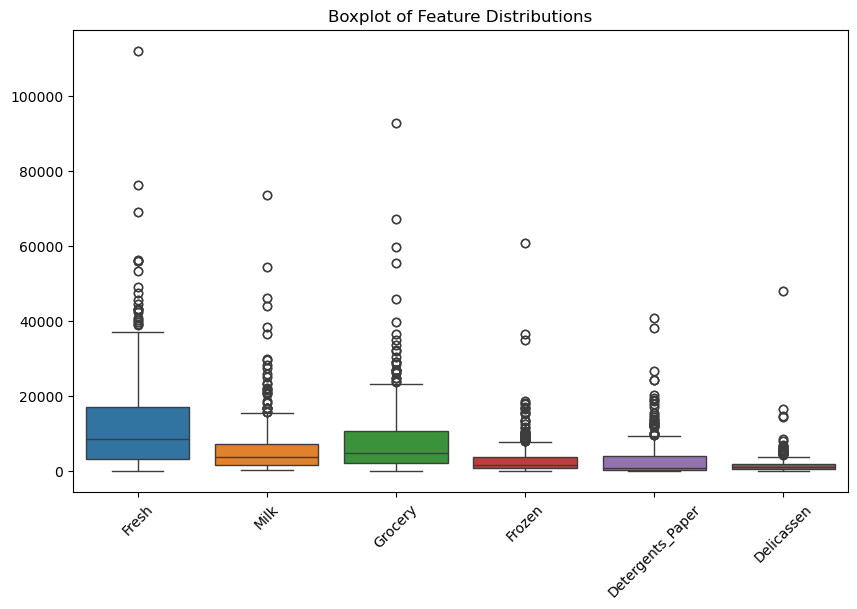

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot of all numeric features
plt.figure(figsize=(10, 6))
sns.boxplot(data=customers.drop(columns=["Channel", "Region"]))
plt.xticks(rotation=45)
plt.title("Boxplot of Feature Distributions")
plt.show()

In [23]:
customers.std(numeric_only=True)

Fresh               12640.132660
Milk                 7376.177813
Grocery              9497.755624
Frozen               4851.911072
Detergents_Paper     4765.141586
Delicassen           2818.501325
dtype: float64

In [ ]:
# Your observations here
#ALL COLUMNS ARE INT64
#THERE IS NO MISSING VALUES
#DATA SHAPE IS (880,8)
#LOOKS LIKE 'Region' and 'Channel' ARE CATEGORIES NOT VALUES. I CHANGED IT TO STRING VALUES 



# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [ ]:
# Your code here

In [ ]:
# Your comment here
#I CHANGED THE DATA TYPE OF THE COLUMNS 'Region' and 'Channel' 

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [24]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()
features_scale = customers.drop(columns=['Channel','Region'])
customers_scale = scaler.fit_transform(features_scale)

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [28]:
# Your code here:
from sklearn.cluster import KMeans
#INICIAR EL MODELO
#SINO SABEMOS CUANTOS CLUSTERS PODEMOS COMENZAR CON 2 O 3 
kmeans = KMeans(n_clusters=3, random_state=42)
#AJUSTAR EL MODELO A LOS DATOS ESCALADOS
kmeans.fit(customers_scale)
#OBTENER ETIQUETAS DE LOS CLUSTERS
labels = kmeans.labels_
#ASIGNAR ESAS ETIQUETAS A TU DATAFRAME ORIGINAL
customers['labels'] = labels
#VER LOS RESULTADOS
print(customers.tail())

    Channel Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
875       1      3  29703  12051    16027   13135               182   
876       1      3  39228   1431      764    4510                93   
877       2      3  14531  15488    30243     437             14841   
878       1      3  10290   1981     2232    1038               168   
879       1      3   2787   1698     2510      65               477   

     Delicassen  labels  
875        2204       0  
876        2346       0  
877        1867       1  
878        2125       0  
879          52       0  


Count the values in `labels`.

In [32]:
# Your code here:
customers['labels'].value_counts()

labels
0    692
1    174
2     14
Name: count, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [30]:
# Your code here
from sklearn.cluster import DBSCAN
#eps=0.5 ES UN VALOR POR DEFECTO QUE SUELE USARSE COMO PUNTO DE PARTIDA
dbscan = DBSCAN(eps=0.5)
#FIT THE MODEL CON LA BASE DE DATOS
dbscan.fit(customers_scale)
#AGREGAS LAS COLUMNA OTRA VEZ A LA BASE ORIGINAL. labels_ ES PARA QUE EL MODELO AUTOMATICAMENTE AGREGUE LA CATEGORIA 
customers['labels_DBSCAN'] = dbscan.labels_

Count the values in `labels_DBSCAN`.

In [31]:
# Your code here
print(customers['labels_DBSCAN'].value_counts())



labels_DBSCAN
 0    560
-1    282
 1     12
 2      8
 4      6
 3      6
 5      6
Name: count, dtype: int64


# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

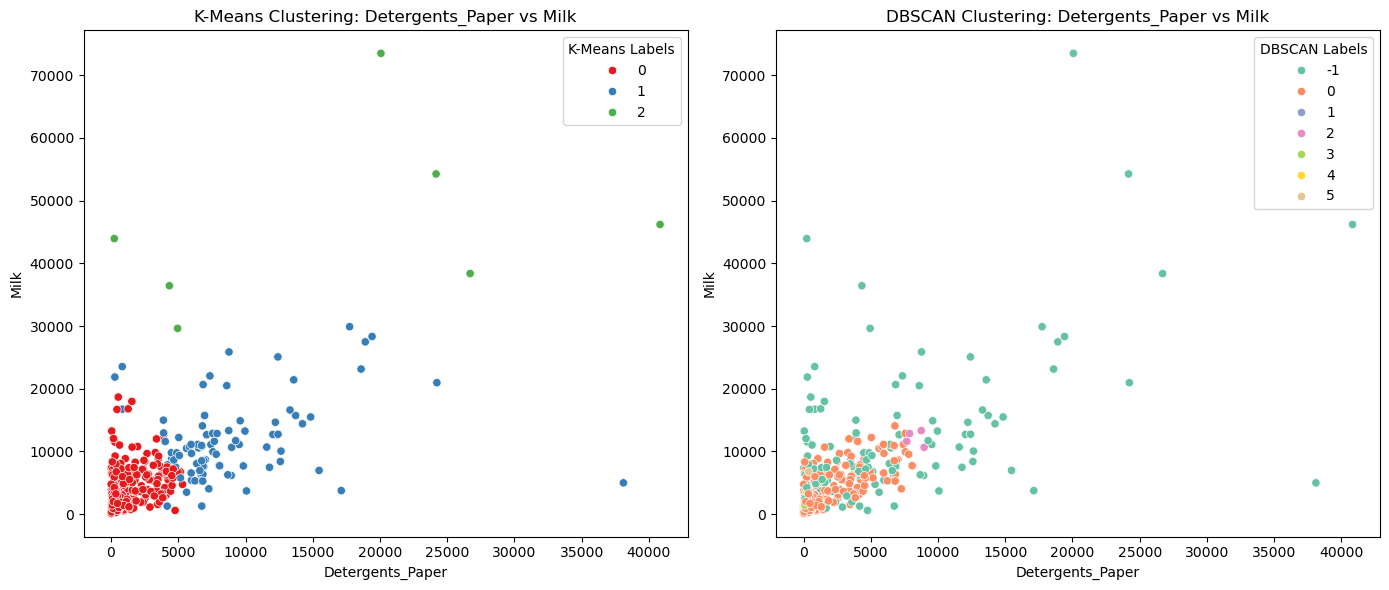

In [33]:
# Your code here:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_clusters(x_col, y_col):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # K-Means
    sns.scatterplot(data=customers, x=x_col, y=y_col, hue='labels', palette='Set1', ax=axes[0])
    axes[0].set_title(f'K-Means Clustering: {x_col} vs {y_col}')
    axes[0].legend(title='K-Means Labels')

    # DBSCAN
    sns.scatterplot(data=customers, x=x_col, y=y_col, hue='labels_DBSCAN', palette='Set2', ax=axes[1])
    axes[1].set_title(f'DBSCAN Clustering: {x_col} vs {y_col}')
    axes[1].legend(title='DBSCAN Labels')

    plt.tight_layout()
    plt.show()

# To plot the first pair
plot_clusters('Detergents_Paper', 'Milk')

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

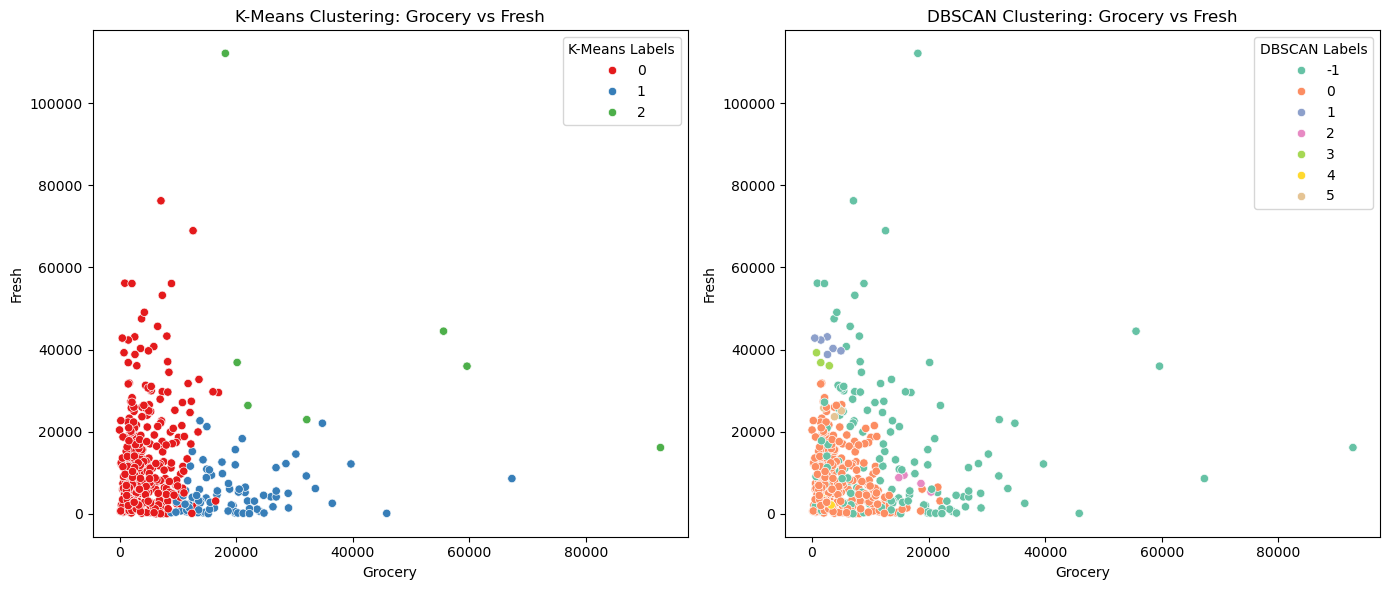

In [34]:
# Your code here:
def plot_clusters(x_col, y_col):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # K-Means
    sns.scatterplot(data=customers, x=x_col, y=y_col, hue='labels', palette='Set1', ax=axes[0])
    axes[0].set_title(f'K-Means Clustering: {x_col} vs {y_col}')
    axes[0].legend(title='K-Means Labels')

    # DBSCAN
    sns.scatterplot(data=customers, x=x_col, y=y_col, hue='labels_DBSCAN', palette='Set2', ax=axes[1])
    axes[1].set_title(f'DBSCAN Clustering: {x_col} vs {y_col}')
    axes[1].legend(title='DBSCAN Labels')

    plt.tight_layout()
    plt.show()

# To plot the first pair
plot_clusters('Grocery', 'Fresh')

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

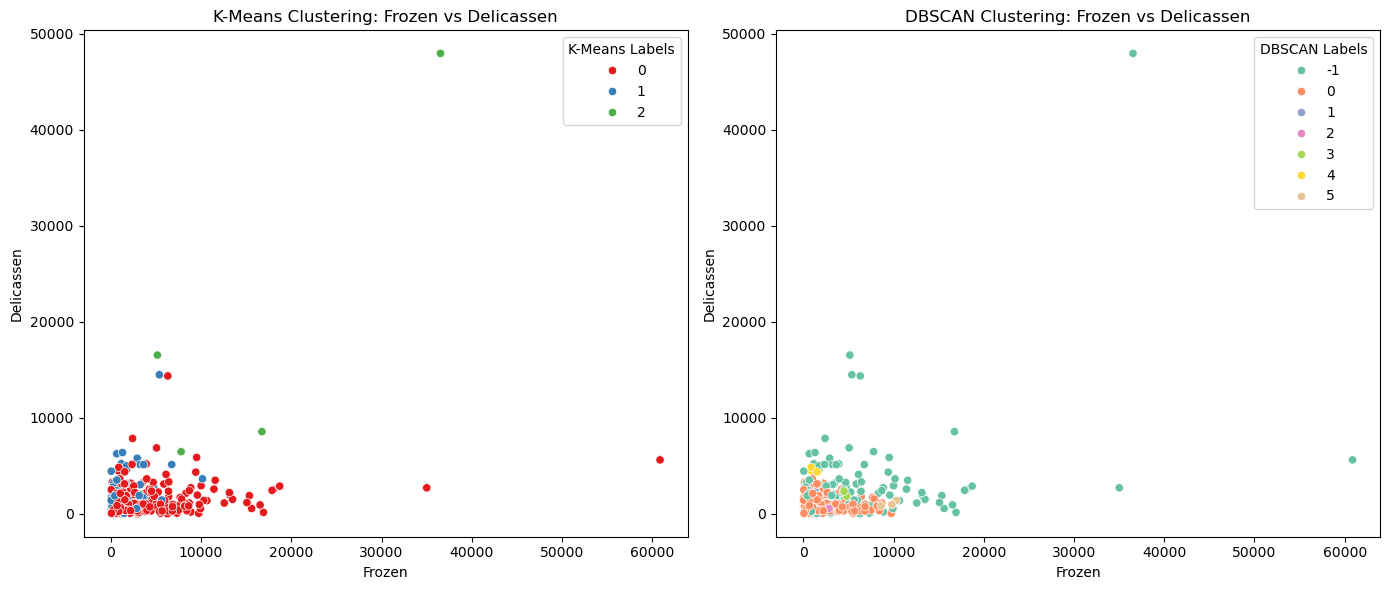

In [35]:
# Your code here:
def plot_clusters(x_col, y_col):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # K-Means
    sns.scatterplot(data=customers, x=x_col, y=y_col, hue='labels', palette='Set1', ax=axes[0])
    axes[0].set_title(f'K-Means Clustering: {x_col} vs {y_col}')
    axes[0].legend(title='K-Means Labels')

    # DBSCAN
    sns.scatterplot(data=customers, x=x_col, y=y_col, hue='labels_DBSCAN', palette='Set2', ax=axes[1])
    axes[1].set_title(f'DBSCAN Clustering: {x_col} vs {y_col}')
    axes[1].legend(title='DBSCAN Labels')

    plt.tight_layout()
    plt.show()

# To plot the first pair
plot_clusters('Frozen', 'Delicassen')

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [39]:
# Filtrar solo las columnas numéricas
numeric_cols = customers.select_dtypes(include='number').columns

# Agrupar por 'labels' de K-Means y calcular la media solo para columnas numéricas
kmeans_grouped = customers.groupby('labels')[numeric_cols].mean()
print("Means by K-Means Clusters:")
print(kmeans_grouped)

# Agrupar por 'labels_DBSCAN' de DBSCAN y calcular la media solo para columnas numéricas
dbscan_grouped = customers.groupby('labels_DBSCAN')[numeric_cols].mean()
print("\nMeans by DBSCAN Clusters:")
print(dbscan_grouped)

Means by K-Means Clusters:
               Fresh          Milk       Grocery        Frozen  \
labels                                                           
0       13082.294798   3499.101156   4374.953757   3300.161850   
1        5273.977011  11693.620690  19361.241379   1589.793103   
2       42117.285714  46046.142857  42914.285714  10211.714286   

        Detergents_Paper    Delicassen  labels  labels_DBSCAN  
labels                                                         
0            1094.618497   1238.020231     0.0      -0.098266  
1            8825.586207   1807.390805     1.0      -0.574713  
2           17327.571429  12192.142857     2.0      -1.000000  

Means by DBSCAN Clusters:
                      Fresh          Milk       Grocery       Frozen  \
labels_DBSCAN                                                          
-1             16476.198582  10637.063830  14640.992908  5363.063830   
 0              8859.967857   3415.557143   4731.042857  1898.585714   
 1     

Which algorithm appears to perform better?

In [ ]:
# Your observations here
#K-MEAN PERFORM BETTER AS IT CLUSTER MORE CONSISTENCY
#FOR THE MAJORITY OF THE CATEGORY EXCEPT FROZEN VS DELICASSEN


# Bonus Challenge 1 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 2 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here